# Snapchat Political Ads
This project uses political ads data from Snapchat, a popular social media app. 
Using the data, we can raise questions like: 

- What are the most prevalent organizations, advertisers, and ballot candidates in the data? Do you recognize any?
- What are the characteristics of ads with a large reach, i.e., many views? What may a campaign consider when maximizing an ad's reach?
- What are the characteristics of ads with a smaller reach, i.e., less views? Aside from funding constraints, why might a campaign want to produce an ad with a smaller but more targeted reach?
- What are the characteristics of the most expensive ads? If a campaign is limited on advertising funds, what type of ad may the campaign consider?
- What groups or regions are targeted frequently? (For example, for single-gender campaigns, are men or women targeted more frequently?) What groups or regions are targeted less frequently? Why? Does this depend on the type of campaign?
- Have the characteristics of ads changed over time (e.g. over the past year)?
- When is the most common local time of day for an ad's start date? What about the most common day of week? (Make sure to account for time zones for both questions.)

### Getting the Data
We will get our data from [here](https://www.snap.com/en-US/political-ads/). Download both the 2018 CSV and the 2019 CSV. 

The CSVs have the same filename; rename the CSVs as needed.

Note that the CSVs have the exact same columns and the exact same data dictionaries (`readme.txt`).

### Cleaning and EDA
- Concatenate the 2018 CSV and the 2019 CSV into one DataFrame so that we have data from both years.
- Clean the data.
    - Convert `StartDate` and `EndDate` into datetime. Make sure the datetimes are in the correct time zone. You can use whatever timezone (e.g. UTC) you want as long as you are consistent. However, if you want to answer a question like "When is the most common local time of day for an ad's start date," you will need to convert timezones as needed. See Hint 2 below for more information.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.


### Assessment of Missingness
Many columns which have `NaN` values may not actually have missing data. How come? In some cases, a null or empty value corresponds to an actual, meaningful value. For example, `readme.txt` states the following about `Gender`:

>  Gender - Gender targeting criteria used in the Ad. If empty, then it is targeting all genders

In this scenario, an empty `Gender` value (which is read in as `NaN` in pandas) corresponds to "all genders".


### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Importation

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

import folium

# Getting the data

   We decide to use the snapchat advertisements dataset. We have downloaded both dataset from https://www.snap.com/en-US/political-ads/will to datahub and import both datasets below. We noticed that there are many columns for each data set and in order to minimize confusion, we will use the readme.txt given by Snapchat to understand what each column means. 

In [7]:
a18 = pd.read_csv('pa2018.csv')
a19 = pd.read_csv('pa2019.csv')
a19.head(2)

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
0,ec17fe3475f5a1da0acf594a9c920a561ec5ec1f2f063f...,https://www.snap.com/political-ads/asset/d2edd...,USD,47,44305,2019/07/25 19:46:20Z,NaN,Realtime Media,"P.O. Box 13410,Arlington,22219,US",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://action.donaldjtrump.com/o...
1,540247362c666ad1f043308f844785e495da2b13737a47...,https://www.snap.com/political-ads/asset/07575...,USD,5,2224,2019/09/17 13:06:58Z,2019/10/16 20:00:11Z,Blueprint Interactive,"1730 Rhode Island Ave NW Suite 1014,Washington...",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://actionnetwork.org/forms/u...


   We will open the readme.txt files in python, and we will split this txt files to the format of a python dictionary, where each key is the name of each column, and the string will be the details for each columns.

In [31]:
rms = open('readme.txt').readlines()
rms = [r for r in rms if r != '\n']
rd = {}
rms = rms[3:-1]
for r in rms:
    sps = r.split(' - ')
    rd[sps[0]] = sps[1][:-1]
#rd is the column description dictionary that we can use later.
#for example, check the third column, 'spend' from readme.txt
rd[a19.columns[3]]


'Amount (In local currency) spent by the advertiser over the campaign (up to the current date).'

# Cleaning and EDA

   Concatenate the 2018 CSV and the 2019 CSV into one DataFrame so that we have data from both years. Check if the concatination is successful by looking at its dimensions. Save the dataFrame as a new variable called `ads`

In [32]:
a18.shape, a19.shape

((659, 34), (3609, 34))

In [33]:
ads = pd.concat([a18, a19])
ads.shape

(4268, 34)

In [34]:
ads.head(1)

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
0,522e7287b12439988a7c9e07fda40402b9d09a401862a4...,https://www.snap.com/political-ads/asset/a2896...,USD,343,111587,2018/10/31 16:32:53Z,2018/11/05 22:32:04Z,Blueprint Interactive,"1730 Rhode Island Ave NW Suite 1014,Washington...",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,en,NaN,NaN,NaN,web_view_url:https://www.plannedparenthoodacti...


## Convert time to correct format

Z at the end of the StartDate and EndDate stand for zulu timezone, which is UTC. The data is uniform: all the times end on 'Z'. We will convert these time to pandas timestamp. Directly converting the time will be ok because they are all the in same timezone.

We will calculate the duration of the time when each ads was up and assign it to a new column called `Duration`

In [35]:
ads.StartDate.apply(lambda x: x[-1]).unique(), ads.EndDate.dropna().apply(lambda x: x[-1]).unique()

(array(['Z'], dtype=object), array(['Z'], dtype=object))

In [36]:
ads = ads.astype({'StartDate':'datetime64', 'EndDate':'datetime64'})
ads = ads.assign(Duration = ads.EndDate - ads.StartDate)

## Remove all the np.NaN columns

Electoral Districts (Excluded), Targeting Connection Type, and Targeting Carrier (ISP) are columns that has all null values as keys. Therefore we will drop these 3 columns, which are for simplier analysis. 

In [37]:
ads.any()[ads.any() == False]

Electoral Districts (Excluded)    False
Targeting Connection Type         False
Targeting Carrier (ISP)           False
dtype: bool

In [38]:
print('Electoral Districts (Excluded): '+ rd['Electoral Districts (Excluded)'])
print('Target Connection Type: ' + rd['Target Connection Type'])
print('Targeting Carrier (ISP): ' + rd['Targeting Carrier (ISP)'])

Electoral Districts (Excluded): Electoral district(s) excluded targeting criteria used in the Ad. When this field is populated Ad impressions will be delivered outside the excluded Electoral district(s).
Target Connection Type: Internet connection type targeting criteria used in the Ad. If empty, then no internet connect type targeting was used.
Targeting Carrier (ISP): Carrier type targeting criteria used in the Ad. If empty, then is it targeting all carrier types.


Based on the data description, we decided that it is safe to assume that Electoral Districts (Excluded) has no use for this analysis, no internet connect type targeting was used for targeting connection type, and Targeting Carrier (ISP) is targeting all carrier types. We will remove these columns from the dataset.

In [39]:
ads = ads.drop((ads.any()[ads.any() == False]).index, axis = 1)
ads.shape

(4268, 32)

## Exploration the types of remaining columns in the DataFrame

In [130]:
ads.dtypes.to_frame().head()

,0
ADID,object
CreativeUrl,object
Currency Code,object
Spend,int64
Impressions,int64


In [131]:
#Print all of them
ads.dtypes.to_frame().T

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Postal Codes (Excluded),Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,CreativeProperties,Duration
0,object,object,object,int64,int64,datetime64[ns],datetime64[ns],object,object,object,...,object,object,object,object,object,object,object,object,object,timedelta64[ns]


## Simple exploration

What are the quantative data in this dataset? After checking the dtypes of the dataframe we know some of them are as type float, but it doesn't necessarily means these columns are quantative. `ADID` would be a nomial, for example, but the columns `Spend`, and `Impressions` would be reasonably quantative data that we can explore in Histogram.

Text(0.5, 1.0, 'Impressions')

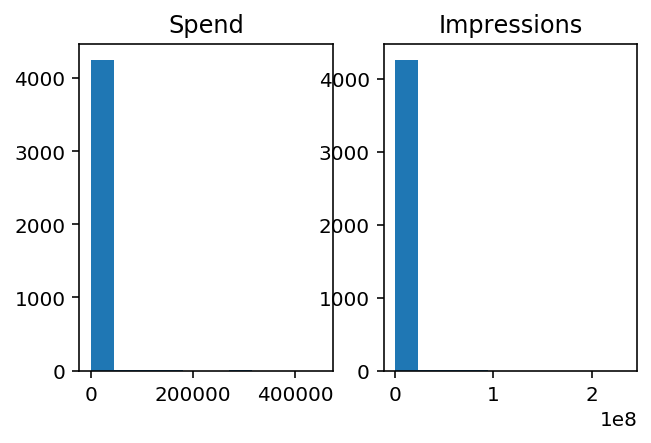

In [46]:
fig, axs = plt.subplots(1,2,figsize=(5,3))

# plot spend
axs[0].hist(ads.Spend)
axs[0].set_title('Spend')

# plot Impression
axs[1].hist(ads.Impressions)
axs[1].set_title('Impressions')


The above result of the histograms seem to be meaningless because we do not observe any distribution of these data. Why? We would plot a box plot to check.

Text(0.5, 1.0, 'Impressions')

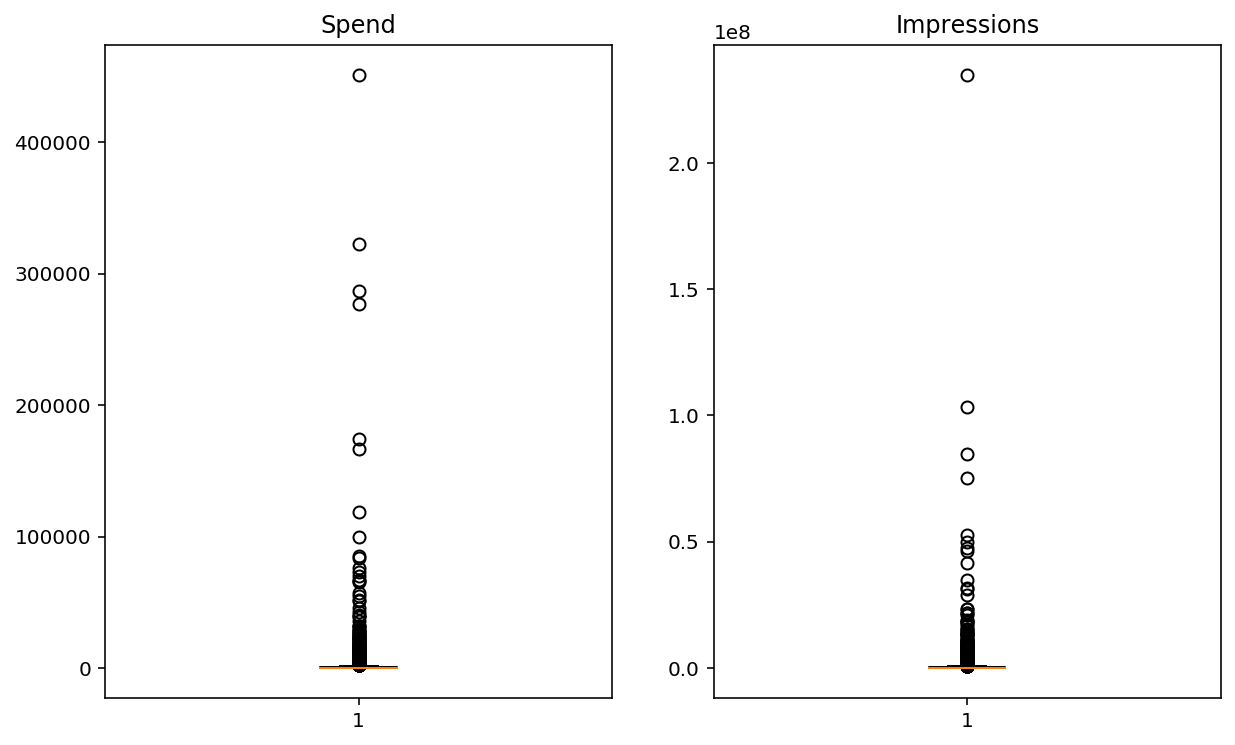

In [47]:
fig, axs = plt.subplots(1,2,figsize=(10,6))

# plot spend
axs[0].boxplot(ads.Spend)
axs[0].set_title('Spend')

# plot Impression
axs[1].boxplot(ads.Impressions)
axs[1].set_title('Impressions')


The observation is that the distribution for both spend and impression are heavily skewed to the right (higher), there are a couple of adds that spend significantly more money than the rest of them, and there are also many impressions that out-numbered the rest.

And if we use the build in describe() method in pandas, we can confirm that the data are skewed to the right. 

In [49]:
ads.Spend.describe(), ads.Impressions.describe()

(count      4268.000000
 mean       1670.500234
 std       12207.914011
 min           0.000000
 25%          40.000000
 50%         196.000000
 75%         766.500000
 max      451244.000000
 Name: Spend, dtype: float64, count    4.268000e+03
 mean     7.005507e+05
 std      4.943951e+06
 min      1.000000e+00
 25%      1.319300e+04
 50%      7.166300e+04
 75%      3.233642e+05
 max      2.349018e+08
 Name: Impressions, dtype: float64)

    Question: 
    
    What are the organizations that spend the most on the advertisements? What are some organizations that have the most impressions among users?

In [50]:
ads.sort_values('Spend', ascending=False).OrganizationName

460            General Mills
3391           General Mills
657            General Mills
3132           General Mills
3352           General Mills
                ...         
2074    Warren for President
2324               Greetings
3344    Warren for President
2824    UnRestrict Minnesota
2167    UnRestrict Minnesota
Name: OrganizationName, Length: 4268, dtype: object

The granularity of the table isn't on each organization. Each row represents an advertisement, not an organization. Since an organization could have multiple rows, we need to group this dataframe by organization.

In [51]:
gp = ads.groupby('OrganizationName')['Spend', "Impressions"].sum()

In [52]:
#Top 10 spending
gp.sort_values('Spend', ascending=False).index[:10]

Index(['General Mills', 'Assembly', 'Cossette Media Inc', 'Mediavest Spark',
       'Hawkfish LLC', 'Australian Government Department of Finance',
       'Blueprint Interactive', 'R/GA', 'ACRONYM',
       'Dentsu Aegis Network France'],
      dtype='object', name='OrganizationName')

In [53]:
#Top 10 impressions
gp.sort_values('Impressions', ascending=False).index[:10]

Index(['General Mills', 'Cossette Media Inc', 'Assembly',
       'Dentsu Aegis Network France', 'Mediavest Spark', 'Chong and Koster',
       'The Aber Group', 'R/GA', 'Hawkfish LLC', 'Blueprint Interactive'],
      dtype='object', name='OrganizationName')

Above we have the organizations/company that spent the most and made the most impressions on advertisement (Top 10). We recognize General Mills as a large food company, and many of them who spend the most money has appearance in the top impression lists too.

Let us visualize the Spend and Impressions that are in a reasonable range. According to the boxplot, most of the spend are uder 100000, and most of the impressions are under 0.5e8. We realized if we plot the data:
    
    
    ads[ads.Spend <= 100000].Spend
    ads[ads.Impressions <= 0.5 * 10 ** 8].Impressions
    
into histogram, we still would not get meaningful observations, therefore we keep replacing number smaller than 100000 and 0.5 * 10 ** 8 to find better distributions to observe. We know, of course, that the plot are just part of the distribution, there are many large outliers that skewed the data but not included in the plot.

In [54]:
spd = ads[ads.Spend <= 1000].Spend
ips = ads[ads.Impressions <= 0.5 * 10 ** 6].Impressions

Text(0.5, 1.0, 'Impressions')

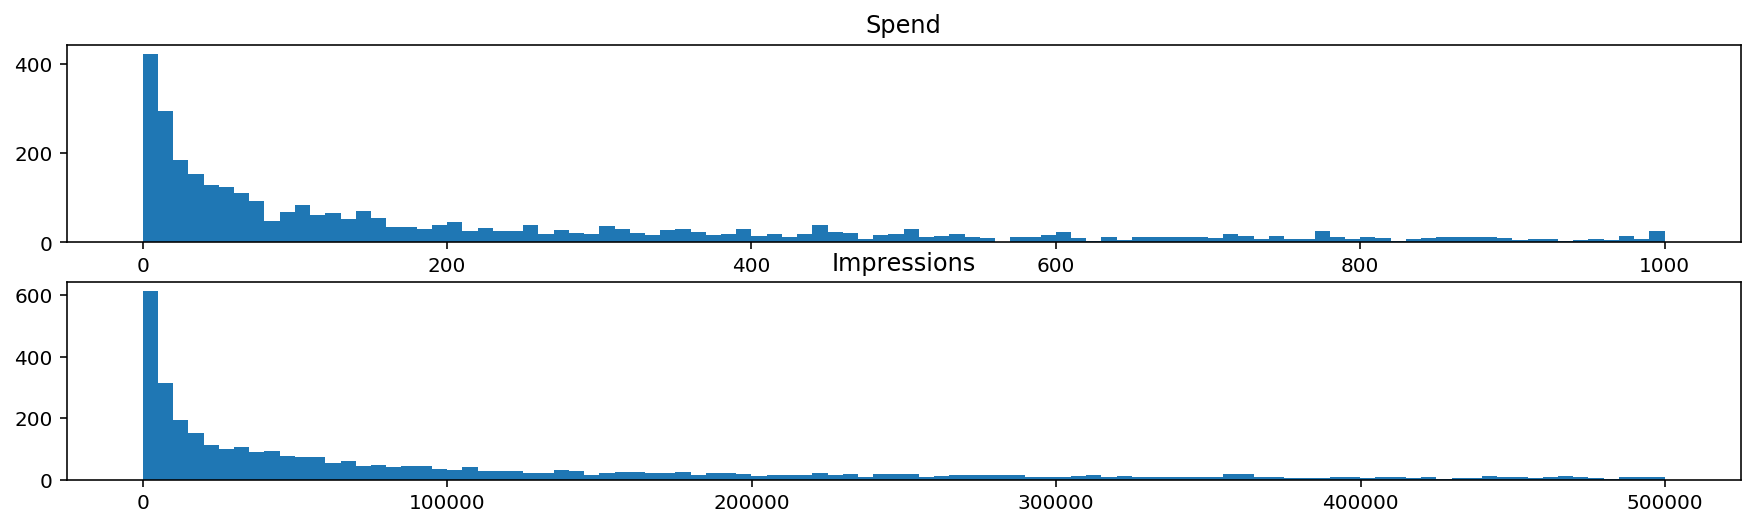

In [55]:
fig, axs = plt.subplots(2,1,figsize=(15,4))

# plot spend
axs[0].hist(spd, bins = 100)
axs[0].set_title('Spend')

# plot Impression
axs[1].hist(ips, bins = 100)
axs[1].set_title('Impressions')

When we zoom in to see a better visualization of the distribution of spend and impressions, we found that there is a really similar pattern of both variables: most of the data are gathered around 0, it is single peaks (unimodel), and skewed to the right. We can infer that spend and impressions are associated based on the similarity in their density patterns

    Question:
    How strong is the association between Spend and Impressions for organizations working with Snapchat in year 2018 and 2019?

In [56]:
spend = ads.Spend
impressions = ads.Impressions

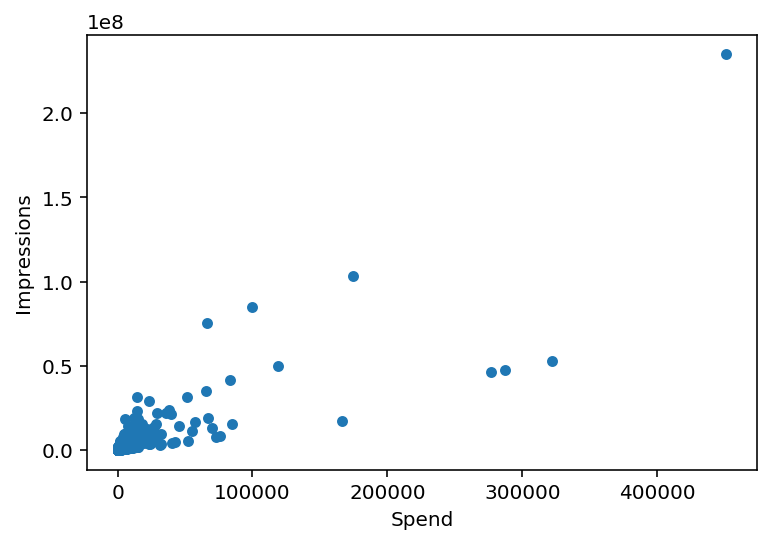

In [57]:
ads.plot(kind='scatter', x='Spend', y='Impressions');

The x axis is the spend, and the corresponding impressions. Even though most of the data appeared in the left bottom corner, we can still see a fan shape. How can we know the exact association? Maybe calculating the corelation coefficient will help?

In [58]:
np.corrcoef(spend, impressions)[0][1]

0.8422988483906694

A corelation coefficient of 0.84 means that the two variables are very correlated. But is it safe to assume that spending is positively associated with impressions?
Even though the r value shows that the increase of spending will cause the impressions to increase, there are outliers, such as the single dot on the most right top corner of the graph. That one single dot, further away from the rest of the data, will have a stronger influence on the correlation coefficient. However, the r value will not lie and we will still conclude that these two variables are associated.

    Question:
    Since we have calculated the duration of each advertisement in the table, does spending correlated with the time duration?

In [158]:
#We will conver them into days

Duration = ads.Duration

Duration.apply(lambda x: x.days).describe()

count    3491.000000
mean       24.757376
std        38.914208
min      -222.000000
25%         5.000000
50%        17.000000
75%        28.000000
max       370.000000
Name: Duration, dtype: float64

#it is very strange, why are there negative time duration values? How can one ads's finishing time is earlier than its starting time? We will dig deeper into this

In [159]:
wired = ads[Duration.apply(lambda x: x.days) < 0][['Spend', 'Impressions', 'StartDate', 'EndDate', 
                                                   'OrganizationName', 'Duration']]

print('Number of wired time duration ads: ' + str(len(wired)))
wired.head()

Number of wired time duration ads: 27


,Spend,Impressions,StartDate,EndDate,OrganizationName,Duration
335,39,15301,2019-09-04 04:00:00,2019-08-31 03:59:59,Chong and Koster,-5 days +23:59:59
427,10,3802,2019-09-04 04:00:00,2019-08-31 03:59:59,Chong and Koster,-5 days +23:59:59
546,16,5885,2019-09-04 04:00:00,2019-08-31 03:59:59,Chong and Koster,-5 days +23:59:59
674,100,46061,2019-02-26 12:00:00,2019-02-23 02:30:00,Javier Bravo for Governor,-4 days +14:30:00
1005,13,5224,2019-09-04 04:00:00,2019-08-31 03:59:59,Chong and Koster,-5 days +23:59:59


There are 27 rows with negative value of duration, we have printed out some of them above in a data frame with columns that may be useful. We realized that these wired rows have a normal Spend and Impression, meaning there might just be some errors in the data collection process: maybe when the organization input the startdate and the end date, they mess up the order of the two. But we do not know for sure. Based on the fact that 27 is a very small proportion of the whole data set. We decide to drop them for meaningful data analysis.

In [160]:
not_wired = ads[Duration.apply(lambda x: x.days) >= 0]
not_wired = not_wired.assign(days=not_wired.Duration.apply(lambda x: x.days))

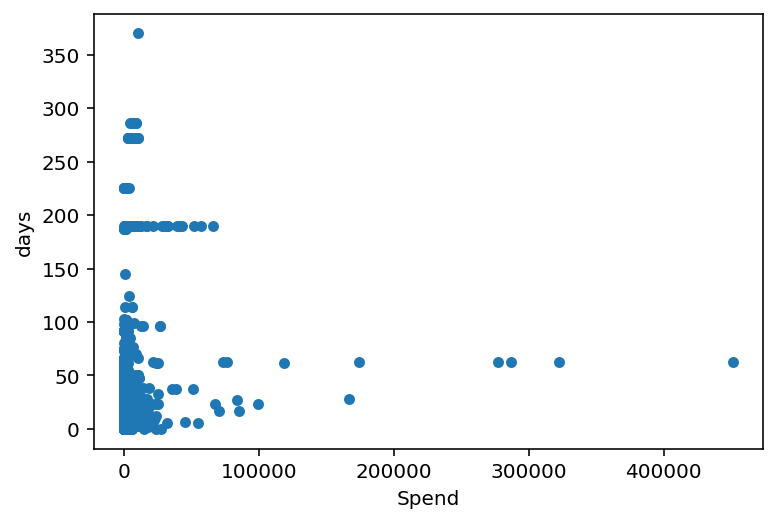

In [161]:
not_wired.plot(kind='scatter', x='Spend', y='days');

In [162]:
np.corrcoef(not_wired.Spend, not_wired.days)[0][1]

0.11609602712861213

Intepretation of the plot and the r value: We plot the duration days based on Spend. Even though we did not plot the exact duration (like using units of seconds or minutes), we can still see that from the plot, there seems to be no association between spend and days durations. It can also be inferred from the 0.11 correlation coefficient. 0.11 is siginicantly smaller than even 0.5, showing that there is no observable association.

In [163]:
wired[wired.OrganizationName == 'Chong and Koster'].head()

,Spend,Impressions,StartDate,EndDate,OrganizationName,Duration
335,39,15301,2019-09-04 04:00:00,2019-08-31 03:59:59,Chong and Koster,-5 days +23:59:59
427,10,3802,2019-09-04 04:00:00,2019-08-31 03:59:59,Chong and Koster,-5 days +23:59:59
546,16,5885,2019-09-04 04:00:00,2019-08-31 03:59:59,Chong and Koster,-5 days +23:59:59
1005,13,5224,2019-09-04 04:00:00,2019-08-31 03:59:59,Chong and Koster,-5 days +23:59:59
1101,14,5304,2019-09-04 04:00:00,2019-08-31 03:59:59,Chong and Koster,-5 days +23:59:59


As we observed the wired data, we found out that from just the couple of data we dropped, there were some ads start and end at the same time from the same orgization. 

From the scattter plot, there are many horizontal lines (for example, at round y(days) = 200, there are many spend points with the same days. It might be explained by the fact that each organization signed up multiple contract with Snapchat for its different ads to have the same amount of time published. For example, Chong and Koster, have multiple advertisement with same Durations (even though we dropped Chong and Koster because the durations are negative, there are many advertisement come from the same company and have the same duration time)

    Therefore we might have to ask another question.
    
    Question:
    Since we have calculated the duration of each advertisement in the table, does the total spending of each organization correlated with the average time duration of each organization?

In [164]:
#days vs spend

ds = not_wired.groupby('OrganizationName').agg({'days': ['mean'], 'Spend': ['sum']})
ds.columns = ['daymean', 'spendsum']

In [165]:
ds.head(5)

,daymean,spendsum
OrganizationName,,
4degre.es Inc,5.000000,110
"A+G, LLC",0.000000,27
ACRONYM,15.708791,153123
ACYP,6.000000,350
Act Svenska kyrkan,43.000000,1


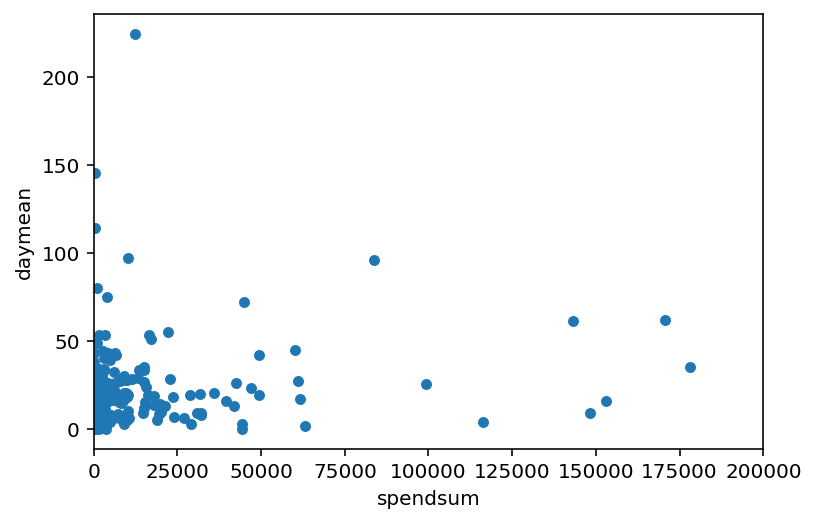

In [166]:
ds.plot(kind='scatter', y='daymean', x='spendsum', xlim = [-1, 200000]);

In [167]:
np.corrcoef(ds.daymean, ds.spendsum)[0][1]

0.2902639368009151

Intepretation of the plot and the r value: We could not tell the association by our eye because there are outliers and most of the data are gathered at the left bottom corner. So we limit our x values of spendsum to be within a smaller range. 

However, running the numpy correlation coefficient function tells us that we have a r value of 0.2902639368009151, which is siginicantly smaller than even 0.5, showing that there is no association.

One possible explaination obeversed from the plot is that there are too many ads that do not spend that much of money and still last for quite a long time. The time duration did not include anything such as the frequency the users might see the ads, an advertisement being on snapchat for a long time does not mean it will get more possible viewers as well. So it is likely that snapchat will allow organizations that pay low to show ads for a long period of time

## More explorations

There aren't many more quantative data that we can plot and observe, because most of our data are nominal or ordinal. However, it is useful to figure out the proportion of missingness for each column, because we do any data imputation if possible.

The DataFrame below represents the percentage of null values for each column. We can using some pie charts to visualize the proportions.

In [174]:
p_missing = ads.isnull().sum() / len(ads)
p_not_missing = 1 - p_missing
prop = pd.DataFrame([p_missing, p_not_missing])
prop.index = ['missing', 'notmissing']
prop.T.head(5)

,missing,notmissing
ADID,0.0,1.0
CreativeUrl,0.0,1.0
Currency Code,0.0,1.0
Spend,0.0,1.0
Impressions,0.0,1.0


In [175]:
has_missing = prop.T[prop.T.missing != 0].T
has_missing

,EndDate,CandidateBallotInformation,Gender,AgeBracket,Regions (Included),Regions (Excluded),Electoral Districts (Included),Radius Targeting (Included),Radius Targeting (Excluded),Metros (Included),...,Postal Codes (Excluded),Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,CreativeProperties,Duration
missing,0.182052,0.866448,0.909794,0.082709,0.724227,0.989456,0.98477,0.928304,0.997188,0.958763,...,0.972587,0.996251,0.999531,0.743674,0.993908,0.29358,0.729381,0.974461,0.173383,0.182052
notmissing,0.817948,0.133552,0.090206,0.917291,0.275773,0.010544,0.01523,0.071696,0.002812,0.041237,...,0.027413,0.003749,0.000469,0.256326,0.006092,0.70642,0.270619,0.025539,0.826617,0.817948


Index(['EndDate', 'CandidateBallotInformation', 'Gender', 'AgeBracket',
       'Regions (Included)', 'Regions (Excluded)',
       'Electoral Districts (Included)', 'Radius Targeting (Included)',
       'Radius Targeting (Excluded)', 'Metros (Included)'],
      dtype='object')

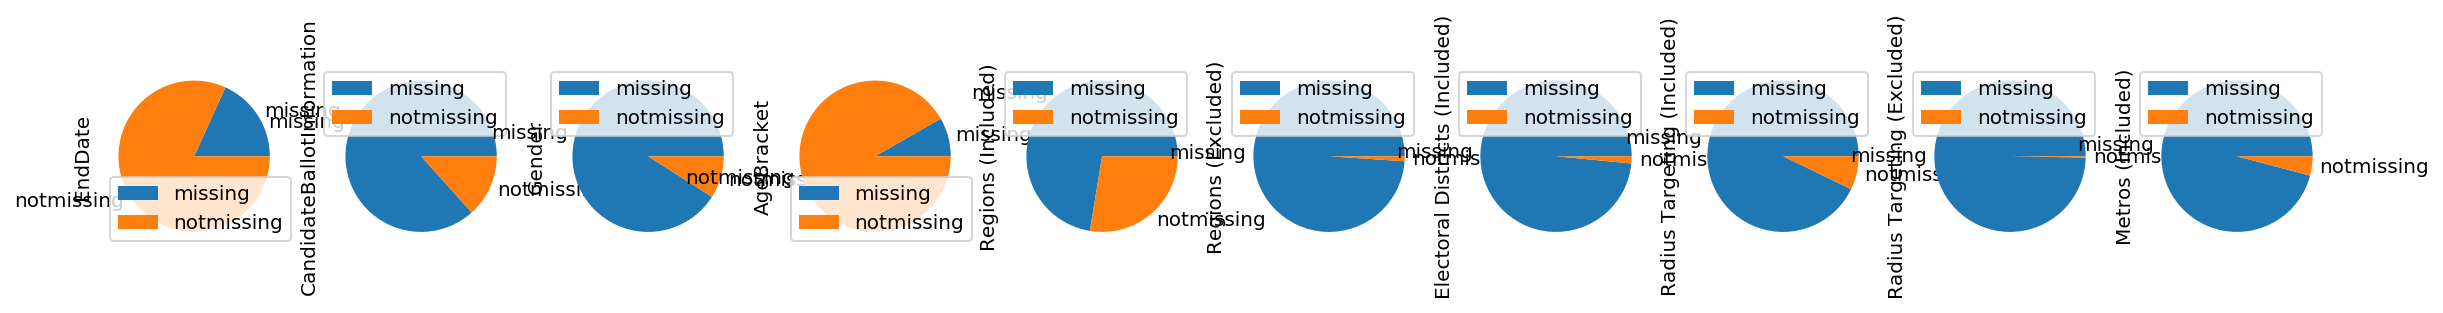

In [176]:
p1 = has_missing.iloc[:,0:10].plot.pie(subplots=True, figsize=(20, 50))
has_missing.columns[:10]

Index(['Metros (Excluded)', 'Postal Codes (Included)',
       'Postal Codes (Excluded)', 'Location Categories (Included)',
       'Location Categories (Excluded)', 'Interests', 'OsType', 'Segments',
       'Language', 'AdvancedDemographics'],
      dtype='object')

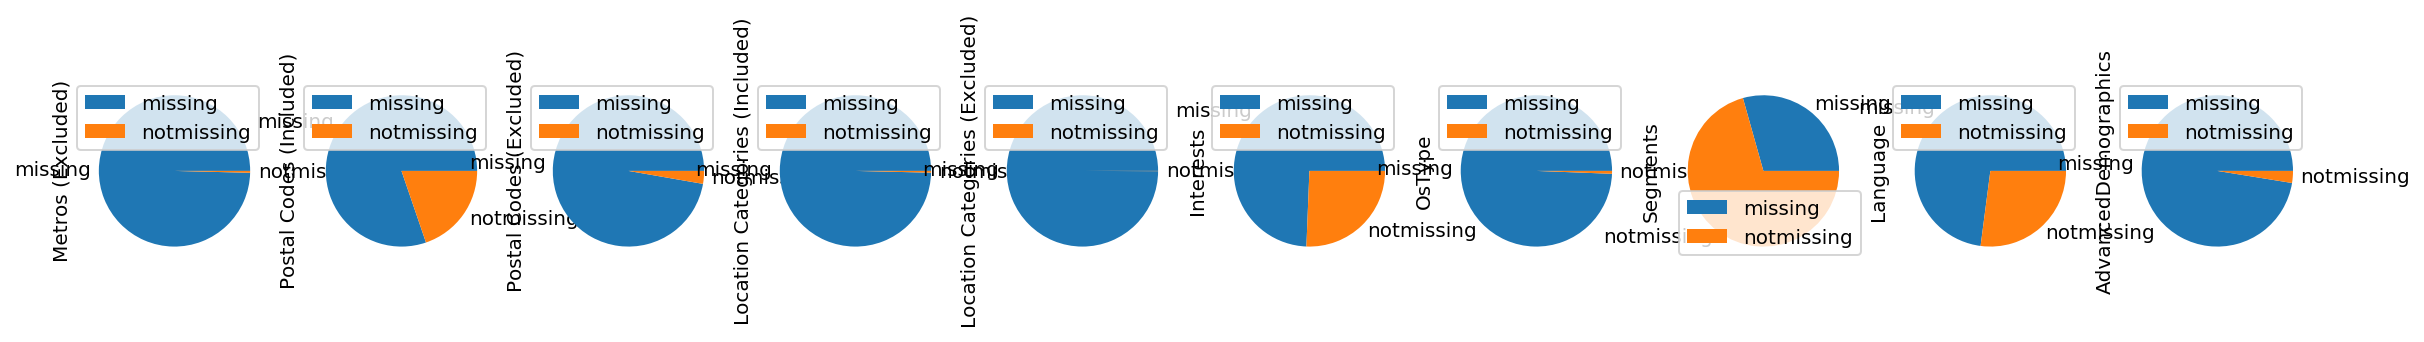

In [177]:
p2 = has_missing.iloc[:,10:20].plot.pie(subplots=True, figsize=(20, 50))
has_missing.columns[10:20]

Index(['CreativeProperties', 'Duration'], dtype='object')

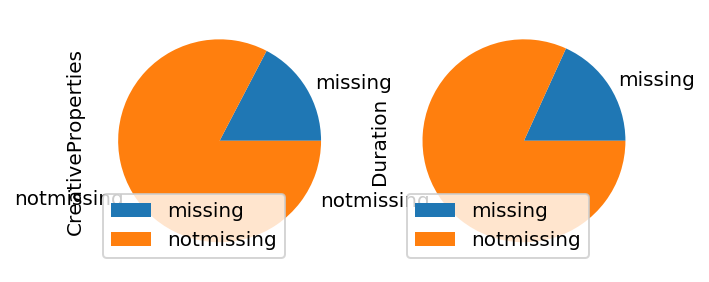

In [178]:
p2 = has_missing.iloc[:,20:].plot.pie(subplots=True, figsize=(5, 5))
has_missing.columns[20:]

These are the pie charts for the proportion of missing of all columns that we have. There are many columns that have a majority of missing data, such as the Metros(excluded), postal code(excludes), location categories includes. 

There are also columns that only have a small proportion of missing data, such as the creativeProperties, durartion, endDate. Enddate, for example, is particularly interesting. We will assess the missingness of this column.

### Assessment of Missingness

We will figure out why some of the data is missing. From readme.txt we are given reasons to why a particular column is missing. "Gender - Gender targeting criteria used in the Ad. If empty, then it is targeting all genders". In this scenario, an empty Gender value (which is read in as NaN in pandas) corresponds to "all genders". 

But we can find columns where it has missingness according to the plot we made above, yet they do not have an explaination in readme.txt. Starting date do not have any missingness, but strangely, endDate has 18% of the advertisement missing. It is hard to assume that it is missing completely at random because since Starting date is not missing, end date should all exist. End date, which represents, the time at which the Ad was set up to stop delivering, might be missing for another reason, explainable by another column in the data frame. For example, we can ask the question: 


Is the end date data missing at random dependent on the `spend` or on the `impressions`? We can look at the distribution of spend by missingness of end date and determine if end date data missing at random dependent on spend, and on impressions

We will plot the distribution of ages by missingness (density curves).

Make a function that graph the distribution of one variable vs missingness of another

In [433]:
def graph(data, col, missing_col, lim = [-999999, 10000000]):
    s = ads.assign(**{'is_null':ads[missing_col].isnull()})
    s.groupby('is_null')[col].plot(kind='kde', legend=True, title='Distribution', xlim=lim);

Plot for both spend and impressions to see if the missingness of end date is dependent on them:

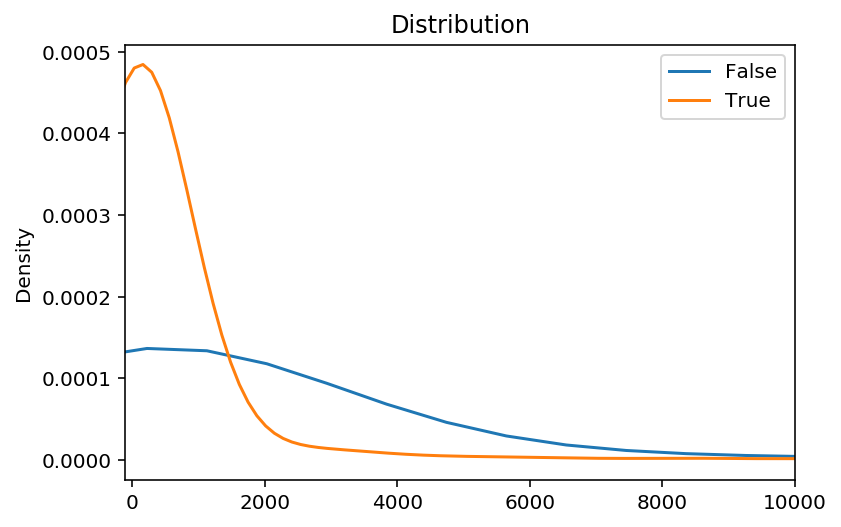

In [434]:
graph(ads, 'Spend', 'EndDate', [-100, 10000])

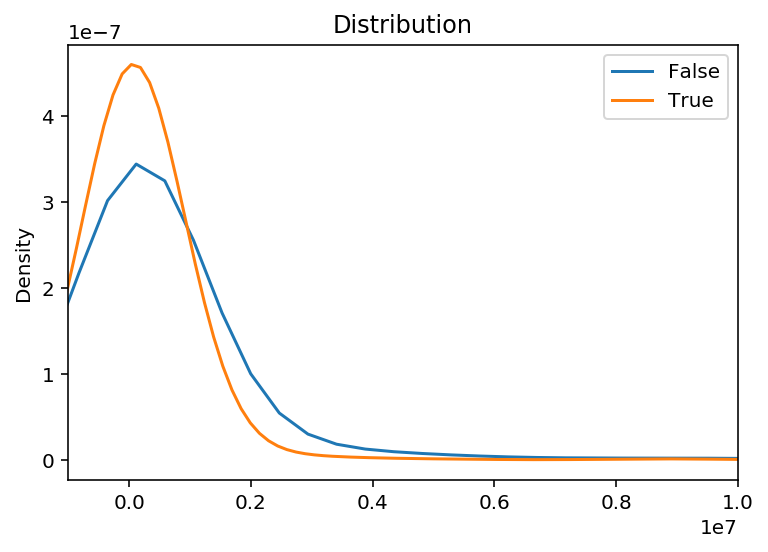

In [435]:
graph(ads, 'Impressions', 'EndDate')

Based on the observation from the plot (we have put limitation on the x axis to zoom in the important part where we are able to see a difference), the missingness of the end date peaks when spend and impressions peak as well. We can take a guess and say Yes they are dependent, however, we need to use the permutation task to comfirm.

For Spend:

    Null Hypothesis: The missingness of End Date in the DataFrame ads is not dependent on the 'Spend' column.
    
    Alternative Hypothesis: The missingness of End Date in the DataFrame ads is dependent on the 'Spend' column. The column 'EndDate' is MAR on spendings of the advertisement.

(significance level: 0.05)

In [492]:
def permutation_test(data, col, group_col, test_statistic, N=1000):

    # get the observed test statistic
    obs = test_statistic(data, col, group_col)

    # run the permutations
    shuffled_stats = []
    for _ in range(N):
        
        shuffled = data[group_col].sample(frac=1, replace=False).reset_index(drop=True)
        with_shuffled = data[[col]].assign(shuffled=shuffled)
        shuffled_stat = test_statistic(with_shuffled, col, 'shuffled')
        shuffled_stats.append(shuffled_stat)

    shuffled_stats = np.array(shuffled_stats)

    return shuffled_stats, obs

In [501]:
def diff_in_means(data, col, group_col):
    
    return data.groupby(group_col)[col].mean().diff().abs().iloc[-1]

In [502]:
s1 = ads.assign(**{'is_null':ads['EndDate'].isnull()})

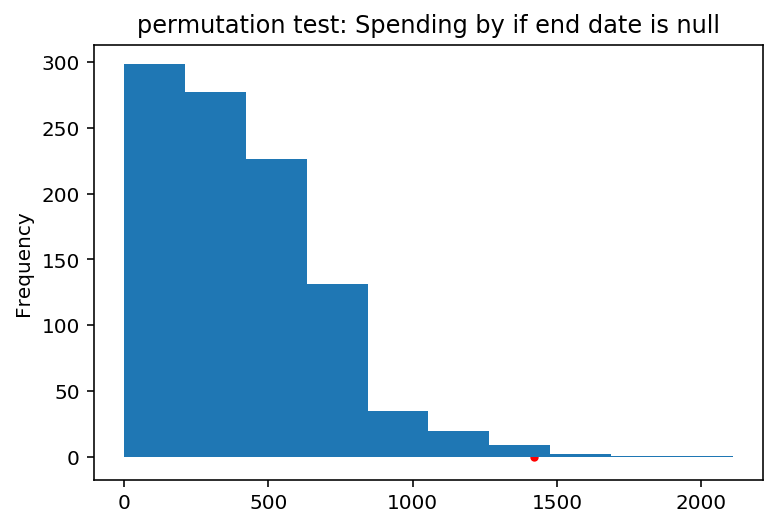

In [503]:
distr, obs = permutation_test(s1, 'Spend',  'is_null', diff_in_means)

pd.Series(distr).plot(kind='hist', title='permutation test: Spending by if end date is null')
plt.scatter(obs, 0, color='r', s=10);

Plotting the sample distributions, we can see that the red dot, representing our observed value, seem to be far away from the normal distribution.

The exact observed difference in the absolute value of mean of spending with null end date and the mean of spending with a valid end date, is shown below

In [504]:
obs

1420.4680537229951

All the possible absolute values simulated by the permutation test, when we shuffle the column for spending, and find the possible absolute values for each simulation
(all test statistics)

In [505]:
distr

array([5.19764246e+02, 1.91470773e+02, 6.76336609e+02, 1.67895448e+02,
       5.47135447e+02, 8.40593420e+02, 7.81549923e+02, 1.45530392e+01,
       3.96301099e+02, 2.52481354e+02, 8.00509756e+02, 4.75597729e+02,
       1.57377222e+02, 4.97795047e+02, 5.33791656e+02, 1.22805665e+03,
       1.66687976e+02, 4.71359703e+02, 3.98266988e+02, 6.24204629e+02,
       1.63049272e+02, 3.46638889e+02, 5.19972221e+02, 6.99349816e+02,
       4.93011190e+02, 2.81112701e+00, 7.25917008e+02, 1.66841830e+02,
       3.86187230e+02, 9.47022640e+01, 6.88719235e+01, 5.02490768e+02,
       5.35253479e+02, 6.46568061e+02, 3.91236207e+02, 6.36257580e+02,
       2.33841788e+02, 7.33104858e+00, 7.06761173e+02, 9.48262059e+01,
       4.06428176e+02, 8.69631467e+02, 3.52036534e+02, 6.81473458e+02,
       2.80739008e+02, 2.48180421e+02, 4.37656720e+02, 3.92391750e+02,
       3.68548705e+02, 4.89410902e+02, 5.90170535e+02, 6.41398811e+02,
       1.02719959e+03, 1.53014695e+03, 3.56433383e+02, 3.41912937e+02,
      

In [506]:
pval = (distr >= obs).mean()
print('p-value: %f' % pval)

p-value: 0.008000


Try a different approach to confirm: using ks statistics. In case when the mean in difference is really similar for both distribution, it is still possible the overall shape is different enough to reject the null. Therefore, the observed value and the test statistics will be updated using the function ks

In [508]:
def ks(data, col, group_col):
    from scipy.stats import ks_2samp
    valA, valB = data[group_col].unique()
    ks, _ = ks_2samp(
        data.loc[data[group_col] == valA, col],
        data.loc[data[group_col] == valB, col]
    )
    return ks

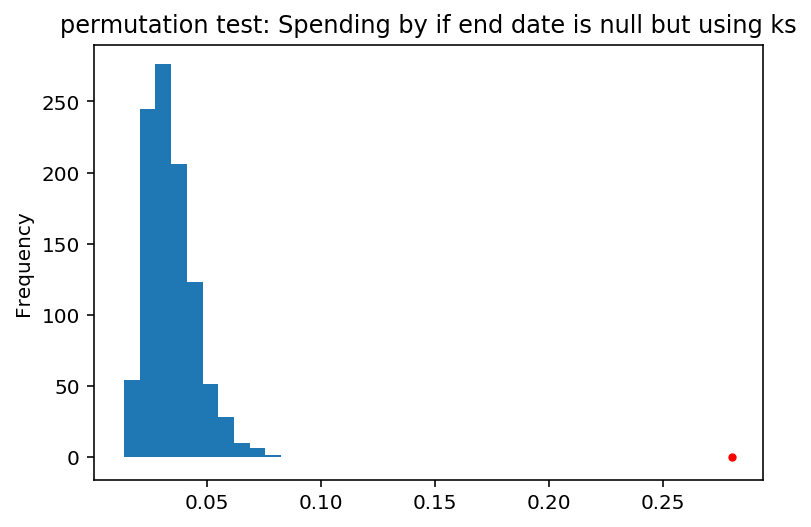

In [509]:
distr, obs = permutation_test(s1, 'Spend',  'is_null', ks)

pd.Series(distr).plot(kind='hist', title='permutation test: Spending by if end date is null but using ks')
plt.scatter(obs, 0, color='r', s=10);

The observed value representing by a red dot looks quite far away from the sampling distribution. We will expect a p value of 0:

In [510]:
pval = (distr >= obs).mean()
print('p-value: %f' % pval)

p-value: 0.000000


The p value is 0.008 for the diff in mean test, and 0 for k statistic test, under 1000 simulation (the default repetition paramter of the permutation function). It is less than the significance level 0.05, that means there are extremely small possibility that we get our observed association between the missingness and spendings by chance. We can reject the null hypothesis, and conclude that the missingness of End Date in the DataFrame ads is dependent on the 'Spend' column. The column 'EndDate' is MAR on spendings of the advertisement.

    Null Hypothesis: The missingness of End Date in the DataFrame ads is not dependent on the 'Impressions' column.
    
    Alternative Hypothesis: The missingness of End Date in the DataFrame ads is dependent on the 'Impressions' column. The column 'EndDate' is MAR on spendings of the advertisement.

In [516]:
s2 = ads.assign(**{'is_null':ads['EndDate'].isnull()})

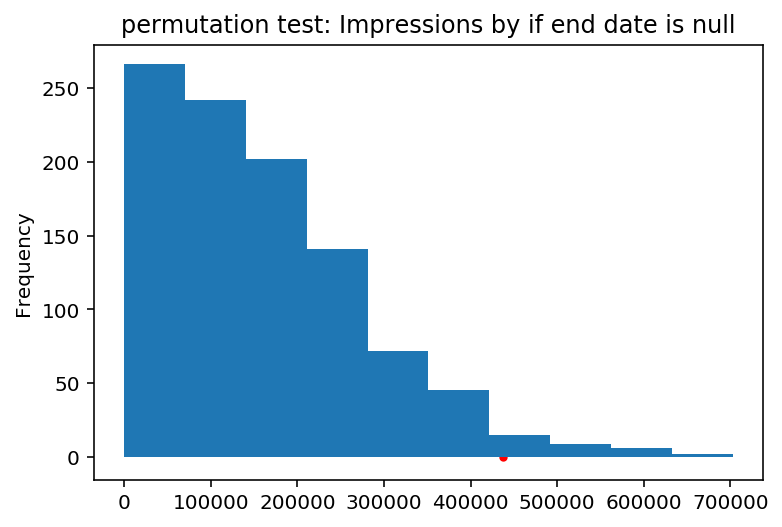

In [517]:
distr, obs = permutation_test(s1, 'Impressions',  'is_null', diff_in_means)

pd.Series(distr).plot(kind='hist', title='permutation test: Impressions by if end date is null')
plt.scatter(obs, 0, color='r', s=10);

Plotting the sample distributions, we can see that the red dot, representing our observed value, seem to be far away from the normal distribution.

In [518]:
pval = (distr >= obs).mean()
print('p-value: %f' % pval)

p-value: 0.032000


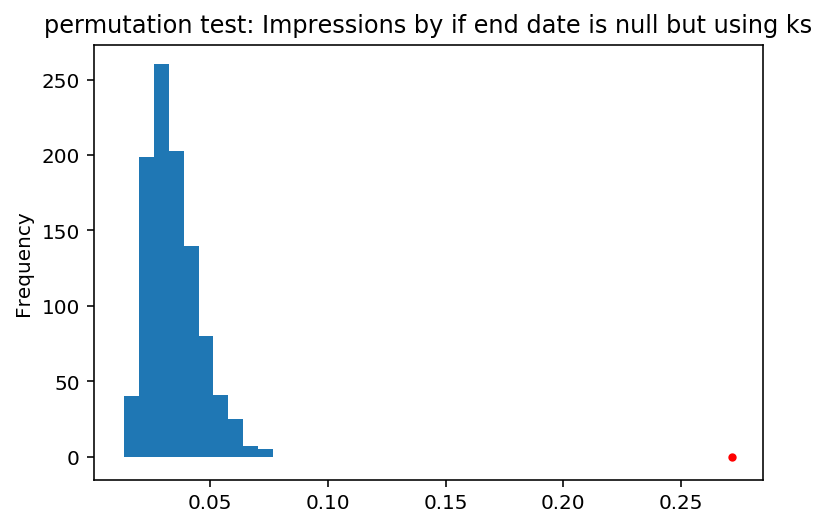

In [519]:
distr, obs = permutation_test(s1, 'Impressions',  'is_null', ks)

pd.Series(distr).plot(kind='hist', title='permutation test: Impressions by if end date is null but using ks')
plt.scatter(obs, 0, color='r', s=10);

Plotting the sample distributions, we can see that the red dot, representing our observed value, seem to be very far away from the normal distribution. It is likely that the p value is just 0: it is impossible for the sample distribution to cover the observed value.

In [521]:
pval = (distr >= obs).mean()
print('p-value: %f' % pval)

p-value: 0.000000


The permutation test with 1000 simulations (of shuttling impressions columns and find the ks statistics of the proportions of missingness of end date)returns p-values 0.0 and 0.0, less than 0.05, that means there are extremely small possibility that we get our observed association between the missingness and impressions by chance. We reject the null hypothesis, and conclude that the missingness of End Date in the DataFrame ads is dependent on the 'impressions' column. The column 'EndDate' is MAR on spendings of the advertisement.

    What about other missingness of the columns?

All the columns that have clear explaination of missing from readme.txt are `MD`, missing by design, because we know exactly why the columns are missing. 

In [204]:
missingcols = has_missing.columns
missingcols

Index(['EndDate', 'CandidateBallotInformation', 'Gender', 'AgeBracket',
       'Regions (Included)', 'Regions (Excluded)',
       'Electoral Districts (Included)', 'Radius Targeting (Included)',
       'Radius Targeting (Excluded)', 'Metros (Included)', 'Metros (Excluded)',
       'Postal Codes (Included)', 'Postal Codes (Excluded)',
       'Location Categories (Included)', 'Location Categories (Excluded)',
       'Interests', 'OsType', 'Segments', 'Language', 'AdvancedDemographics',
       'CreativeProperties', 'Duration'],
      dtype='object')

In [208]:
MD = ['Gender', 'AgeBracket', 'Interests', 'OsType', 'Language', 'AdvancedDemographics']
MD

['Gender',
 'AgeBracket',
 'Interests',
 'OsType',
 'Language',
 'AdvancedDemographics']

Above are all the columns that are missing by design. Let us check other columns for possible another reasons of missingness.

In [216]:
ads['Electoral Districts (Included)'].unique()

array([nan, 'California 25th District', 'Texas 23rd District',
       'Florida 16th District', 'Texas 7th District',
       'California 45th District', 'California 50th District',
       'California 39th District',
       'Florida 27th District,Florida 26th District',
       'Colorado 1st District,Colorado 2nd District,Colorado 6th District'],
      dtype=object)

Looking at the data for `Electoral Districts (Included)` targeting criteria used in the Ad. When this field is populated Ad impressions will be delivered within the included Electoral district(s). Providing political ads might be a sensitive issue. There are some electoral collages that favor one candidate over others. Some of the organization probabily do not want to show their bias in the targeting audience. If people figure out too much information about a specific compaign and all its targetting areas, it might not be beneficial to the candidate. If this is true then we can assume that this column is not ignorable, not missing at random. `NMAR`

# Hypothesis Test

Here is a question that we are interested. 

    For advertisement that target a specific gender, are there more females or more males targetted by advertisement for snapchat? 

In [456]:
sum(ads.Gender == 'FEMALE')

293

In [457]:
sum(ads.Gender == 'MALE')

92

In [180]:
obs = 293 / (293 + 92)
obs

0.7610389610389611

The observed proportion of females is about 76.1% among 385 non missing data.

Since the number of non-missing gender values is quite small (293 + 92) = 385, the rest of the data are all missing, meaning targeting all genders, which is not what we look for because the question asked for advertisement that target a specific gender), even though there are many more female than males, we do not know for sure whether more females are caused by randomness. Therefore we are going to perform a simple hypothesis test.

    Null Hypothesis: for advertisement that target a specific gender (either male or female), there are equal number of ads targetting male and female.
    
    Alternative Hypothesis: there are more females get targetted than males who got targetted for those columns that are not missing.

Test statistic will be the proportion of females. We will do many simulations:

In [191]:
# number of simulations
N = 10000

# Simulate the target gender 293 + 92 = 385 times; do this N  times.
results = np.array([])
for _ in range(N):
    simulation = np.random.choice(['F', 'M'], p = [0.5, 0.5], size = 293 + 92)
    sims = (simulation == 'F').sum() / 385  # test stastistic
    results = np.append(results, sims)

In [192]:
results

array([0.48571429, 0.48311688, 0.49090909, ..., 0.48831169, 0.51688312,
       0.5038961 ])

In [193]:
(results > obs).mean()

0.0

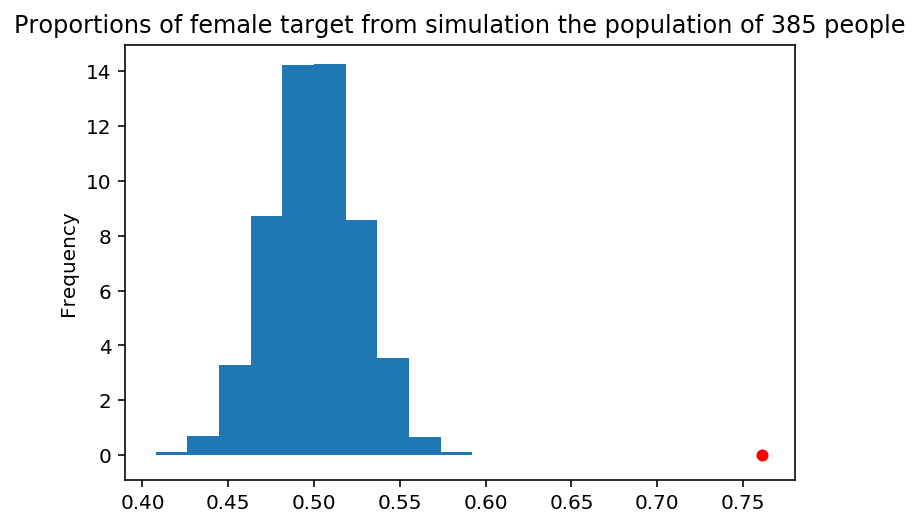

In [194]:
# sampling distribution 
pd.Series(results).plot(kind='hist', density=True, title='Proportions of female target from simulation the population of 385 people');
plt.scatter([obs], [0], s=25, c='r');

The observed value is very far away from the normal distribution. We also get a p value of 0, less than the signicance level 0.05. Therefore we reject the null hypothesis, and conclude that the observed more proportion of female is not caused by randomness. 
There are more females get targetted than males who got targetted for those columns that are not missing.